https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

In [ ]:
import pandas as pd
dataset = pd.read_csv("dataset.csv")

y = 1-(dataset['NG']/dataset['Quantity']) #良率(1-NG/Quantity)
X = dataset.copy()
X.drop(['NG','Quantity'],axis=1, inplace=True)
print(X.head())
print(y.head())

         P1        P2        P3        P4         P5         P6
0  145.0478  0.740194  232.3609  129.6957   6.484784  171.99230
1  355.9522  0.359806  232.3609  129.6957   6.484784   83.60476
2  355.9522  0.359806  569.6391  129.6957  14.515220  204.95930
3  145.0478  0.740194  569.6391  290.3043   6.484784  421.64360
4  355.9522  0.740194  569.6391  129.6957   6.484784  421.64360
0    0.996997
1    0.000000
2    0.000000
3    0.989489
4    0.993994
dtype: float64


In [ ]:
from sklearn.feature_selection import f_regression, mutual_info_regression, chi2,f_classif, mutual_info_classif
import numpy as np

### f_regression score function

In [ ]:
f_test, pval = f_regression(X,y,center=True) 
f_test/=np.max(f_test) # Normalize f_test
print(f_test) # 數字越大，與良率的關係越大(most discriminative feature)

[0.32040168 1.         0.0429277  0.82773765 0.00220811 0.17302867]


### mutual_info_regression score function

In [ ]:
np.random.seed(99)
mi = mutual_info_regression(X, y) # add evaluation of dependency between variables
mi/=np.max(mi) 
print(mi) # 數字越大，與良率的關係越大(most discriminative feature)

[0.49469167 1.         0.75521434 0.80715992 0.60490708 0.63078146]


### chi2 score function

In [ ]:
# y_discrete = pd.qcut(y, q=5,labels=[0,1,2,3,4]) #直接用qcut即可equal frequency分割
idx= np.arange(0,y.size,y.size//5)
idx[-1] = y.size-1
bin_edge= np.sort(y)[idx]
y_ = pd.cut(y, bin_edge,labels=[0,1,2,3,4])
y_ = y_.fillna(0) # 0的範圍超介了
print(pd.value_counts(y_))
y_discrete = pd.DataFrame(y_)
y_discrete = y_discrete.set_axis(['y'], axis = 1, inplace = False)

chi2_score, pval = chi2(X,y_discrete)
chi2_score/=np.max(chi2_score) 
print(chi2_score)

2    20
1    20
0    18
4    17
3    12
dtype: int64
[1.         0.00110242 0.08271511 0.50116058 0.06116246 0.6977304 ]


In [ ]:
f_class_test, pval = f_classif(X,y_) 
f_class_test/=np.max(f_class_test) # Normalize
print(f_class_test) # 數字越大，與良率的關係越大(most discriminative feature)

[0.69856581 0.78461649 0.04379647 0.42551609 1.         0.53055169]


In [ ]:
np.random.seed(99)
mi_class = mutual_info_classif(X, y_)
mi_class/=np.max(mi_class)
print(mi_class)

[0.35998684 0.9621812  0.47910301 0.46230713 0.29684803 1.        ]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


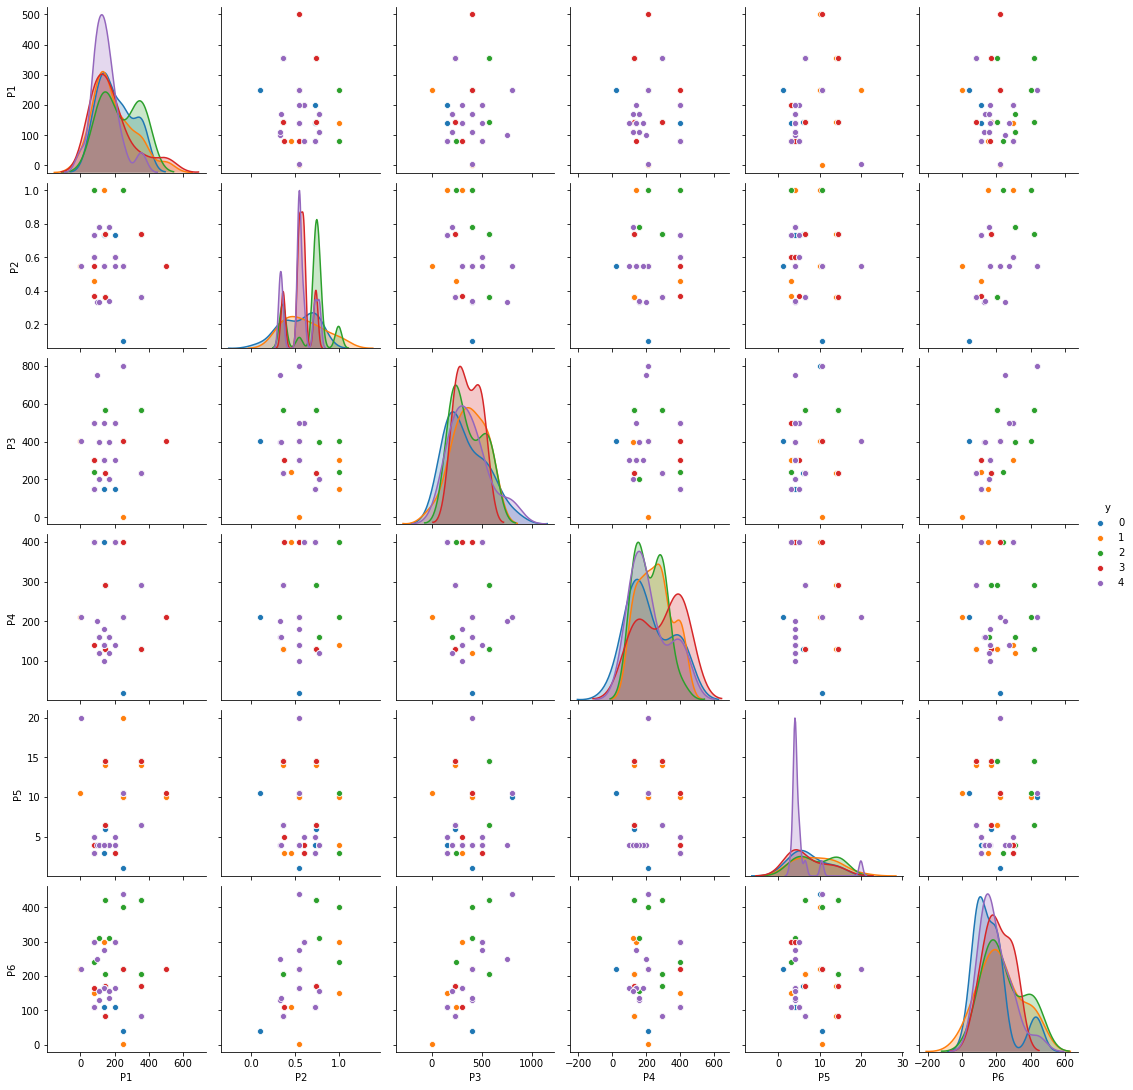

In [ ]:
import seaborn as sns

discrete_y_dataset = X.assign(y = y_discrete)
snspic=sns.pairplot(discrete_y_dataset, hue="y")
# snspic.savefig("sns")